## Степенная базисная поверхность(The NURBS Book 1998, стр.35-36)

### Разбор примера степенной базисной поверхности

В данном примере рассматривается степенная базисная поверхность, заданная формулой:

$$
S(u, v) = \sum_{i=0}^{n} \sum_{j=0}^{m} a_{i,j} u^i v^j
$$

где $a{i,j} = (x{i,j}, y{i,j}, z{i,j})$, а параметры $u$ и $v$ находятся в пределах от 0 до 1.

### Базисные функции

Базисные функции задаются как:
$$
f_i(u) = u^i \quad \text{и} \quad g_j(v) = v^j
$$
И тогда базисные функции можно представить в виде произведения:
$$
u^i v^j
$$

### Изопараметрические кривые

Если мы фиксируем \( u = u_0 \), тогда выражение для поверхности упрощается до:
$$
C_{u_0}(v) = S(u_0, v) = \sum_{j=0}^{m} \left( \sum_{i=0}^{n} a_{i,j} u_0^i \right) v^j = \sum_{j=0}^{m} b_j(u_0) v^j
$$
где
$$
b_j(u_0) = \sum_{i=0}^{n} a_{i,j} u_0^i
$$

Эта кривая $C{u0}(v)$ является степенной базисной кривой на поверхности $S(u,v)$. Аналогично, фиксируя $v = v0$, можно получить другую кривую $C{v0}(u)$.

### Запись поверхности через многочлены

Выражение (1.21) можно записать как:
$$
S(u, v) = \left\{ a_{0,0} + a_{0,1}v + a_{0,2}v^2 + \cdots + a_{0,m}v^m \right\} + 
u \left\{ a_{1,0} + a_{1,1}v + a_{1,2}v^2 + \cdots + a_{1,m}v^m \right\} + 
u^2 \left\{ a_{2,0} + a_{2,1}v + a_{2,2}v^2 + \cdots + a_{2,m}v^m \right\} + 
\cdots + 
u^n \left\{ a_{n,0} + a_{n,1}v + a_{n,2}v^2 + \cdots + a_{n,m}v^m \right\}
$$

Это можно записать в виде:
$$
S(u, v) = b_0 + b_1 u + b_2 u^2 + \cdots + b_n u^n
$$

где каждый $bi$ является многочленом по $v$.

### Алгоритм Горнера для многочленов

Для вычисления этих многочленов используется алгоритм Горнера.

#### Алгоритм Horner1

Этот алгоритм вычисляет значение многочлена в точке $u0$:
```plaintext
Horner1(a, n, u0, C)
{
   C = a[n];
   for (i = n-1; i >= 0; i--)
      C = C * u0 + a[i];
}


#### Алгоритм Horner2

Этот алгоритм вычисляет значение поверхности в точке $u0$, $v0$:
```plaintext
Horner2(a, n, m, u0, v0, S)
{
   for (i = 0; i <= n; i++)
      Horner1(a[i], m, v0, b[i]); // a[i] - i-я строка коэффициентов
   Horner1(b, n, u0, S);
}


In [1]:
def Horner1(a, n, u0):
    C = a[n]
    for i in range(n-1, -1, -1):
        C = C * u0 + a[i]
    return C

def Horner2(a, n, m, u0, v0):
    b = [0] * (n + 1)
    for i in range(n + 1):
        b[i] = Horner1(a[i], m, v0)
    S = Horner1(b, n, u0)
    return S

# Пример использования
a_surface = [
    [1, 2, 3],  # Коэффициенты строки 0
    [4, 5, 6],  # Коэффициенты строки 1
    [7, 8, 9]   # Коэффициенты строки 2
]
n_surface = len(a_surface) - 1  # Степень по u
m_surface = len(a_surface[0]) - 1  # Степень по v

u0 = 0.5
v0 = 0.3

point_on_surface = Horner2(a_surface, n_surface, m_surface, u0, v0)

print(f"Точка на поверхности: {point_on_surface}")


Точка на поверхности: 7.4425


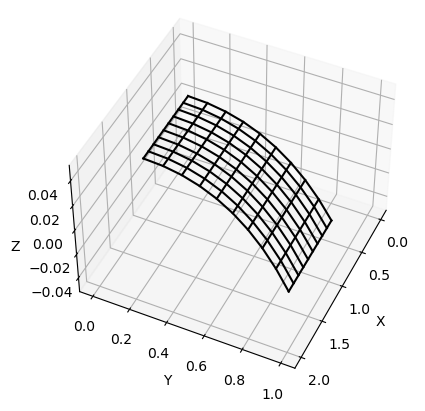

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функция для вычисления значения многочлена Horner по одной переменной
def horner1(a, n, u0):
    # Алгоритм Horner для одной переменной:
    # Этот алгоритм используется для эффективного вычисления значения многочлена
    # с коэффициентами a при заданном значении переменной u0. 
    # Он снижает вычислительные затраты, минимизируя количество операций умножения.
    
    C = a[n]
    for i in range(n-1, -1, -1):
        C = C * u0 + a[i]
    return C

# Функция для вычисления значения многочлена Horner по двум переменным
def horner2(a, n, m, u0, v0):
    # Алгоритм Horner для двух переменных:
    # Этот алгоритм используется для вычисления значения поверхности,
    # представленной как многочлен от двух переменных u и v. 
    # Сначала вычисляются промежуточные значения для каждой строки коэффициентов a
    # (путем использования horner1 по v), а затем вычисляется окончательное значение
    # с помощью horner1 по u.

    b = np.zeros((n + 1, 3))
    for i in range(n + 1):
        for k in range(3):  # Для координат x, y, z
            b[i][k] = horner1(a[i][k], m, v0)
    
    S = np.zeros(3)
    for k in range(3):
        S[k] = horner1(b[:, k], n, u0)
    return S

# Пример коэффициентов для поверхности
a_surface = [
    [[0, 0, 1], [0, 1, 0], [0, 0, 0]],
    [[1, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
]
n_surface = len(a_surface) - 1  # Степень по u
m_surface = len(a_surface[0]) - 1  # Степень по v

# Создаем сетку значений для u и v
u_values = np.linspace(0, 1, 10)
v_values = np.linspace(0, 1, 10)
U, V = np.meshgrid(u_values, v_values)

# Вычисляем точки на поверхности
surface_points = np.zeros((10, 10, 3))

for i in range(10):
    for j in range(10):
        u0 = U[i, j]
        v0 = V[i, j]
        surface_points[i, j] = horner2(a_surface, n_surface, m_surface, u0, v0)

# Отдельно извлекаем координаты X, Y, Z
X = surface_points[:, :, 0]
Y = surface_points[:, :, 1]
Z = surface_points[:, :, 2]

# Визуализация поверхности
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Соединяем точки вручную
for i in range(10):  # Изменяем цикл на 10
    ax.plot(X[i, :], Y[i, :], Z[i, :], color='k')  # Соединение точек вдоль линии u
    ax.plot(X[:, i], Y[:, i], Z[:, i], color='k')  # Соединение точек вдоль линии v

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка фиксированного угла обзора
ax.view_init(elev=45, azim=25)

plt.show()
